In [3]:
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
fracture_dir = '../data/FracAtlas/images/Fractured'
nonfracture_dir = '../data/FracAtlas/images/Non_fractured'
output_dir = './processed_images'

In [5]:
def process_images(img):
    
    #Gaussian filter
    #image_path = '../data/FracAtlas/images/Fractured/IMG0004209.jpg'
    #####original_image = cv.imread(input_path)
    
    #original_image = cv.imread(f'{input_dir}/{image_file}')
    gray_image = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    kernel_size = (5, 5)
    sigma = 1.0
    filtered_image = cv.GaussianBlur(gray_image, kernel_size, sigma)

    #Adaptive histogram equalization
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(filtered_image)

    # Canny Edge Detection
    edges = cv.Canny(equalized_image, 50, 150)
    return edges
    #cv.imwrite(f'{output_dir}/{image_file}', edges)

/Users/mehmetsafaozturkoglu/opt/anaconda3/envs/kirik-tespit/lib/python3.10/site-packages/IPython/extensions/storemagic.py:229: UserWarning: using autorestore/edges requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


Stored 'edges' (ndarray)


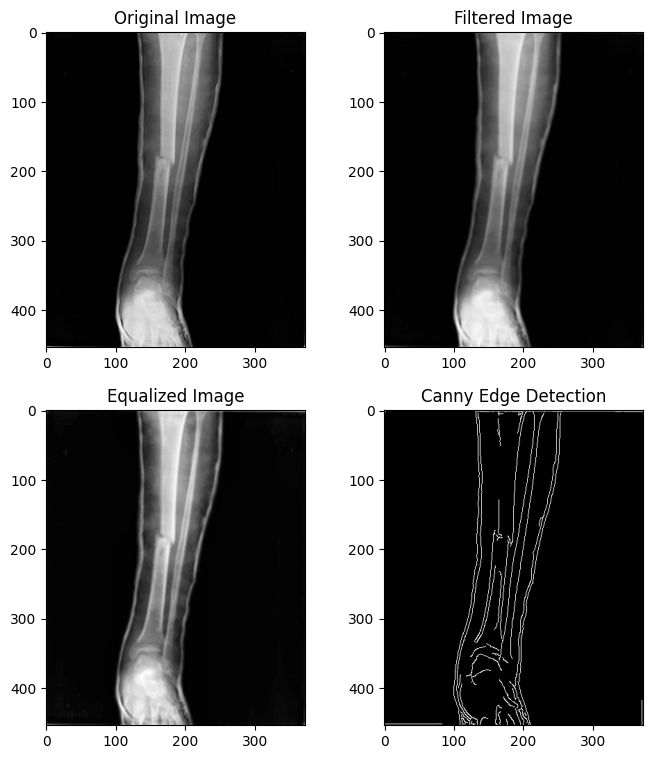

In [5]:
#Gaussian filter
image_path = '../data/FracAtlas/images/Fractured/IMG0004209.jpg'
original_image = cv.imread(image_path)
#original_image = cv.imread(f'{input_dir}/{image_file}')
gray_image = cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)

kernel_size = (5, 5)
sigma = 1.0
filtered_image = cv.GaussianBlur(gray_image, kernel_size, sigma)

#Adaptive histogram equalization
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(filtered_image)

# Canny Edge Detection
edges = cv.Canny(equalized_image, 50, 150)

%store edges

plt.figure(figsize=(8, 9))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()


Text(0.5, 1.0, 'Original Image')

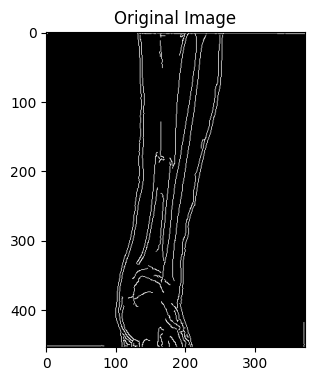

In [48]:
'''
input_path = '../data/FracAtlas/images/Fractured/IMG0004209.jpg'
edges = process_images(input_path)
plt.figure(figsize=(8, 9))

plt.subplot(2, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
'''